In [1]:

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import os , glob
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from skimage.feature import local_binary_pattern as LBP
from skimage.feature import hog ,sift ,orb
from sklearn.svm import SVC ,SVR
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [3]:
def imshow(image , title = None):
    plt.imshow(image , 'gray')
    plt.title(title)
    plt.axis("off")
    plt.show()
    
def ShowGridImage(images , labels , GSize= 5 , title = None ):
    selectedIndex = np.random.choice(len(images) , GSize*GSize)
    fig , axes = plt.subplots(GSize , GSize , figsize = (10,10))
    for i , ax in enumerate(axes.ravel()):
        index = selectedIndex[i]
        image = images[index]
        label = labels[index]
        ax.imshow(image.reshape(100,100), 'gray')
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_title(f"{classes[label]}")
    plt.suptitle(title)
    plt.tight_layout()
    plt.show()

    
    


In [4]:
mainPath = "./Lung X-Ray Image/Lung X-Ray Image/"
classes = os.listdir(mainPath)
images = []
labels = []

for cls in classes:
    folderPath = os.path.join(mainPath,cls)
    for imgname in os.listdir(folderPath):
        imagePath = os.path.join(folderPath , imgname) 
        img = cv2.imread(imagePath,0)
        img = cv2.resize(img , (100,100))
#         lbpFeatures.append(feature)
        images.append(img.flatten())
        
#         label.append(label)
        labels.append(classes.index(cls))


In [6]:
images = np.array(images)
labels = np.array(labels)

In [7]:
trainImages , testImages ,trainLabels , testLabels = train_test_split(images , labels ,test_size=0.2 ,random_state=0)

In [8]:
model  = DecisionTreeClassifier()

In [9]:
model.fit(trainImages, trainLabels)

DecisionTreeClassifier()

In [10]:
preds = model.predict(testImages)

In [11]:
accuracy_score(testLabels , preds)

0.7381294964028777

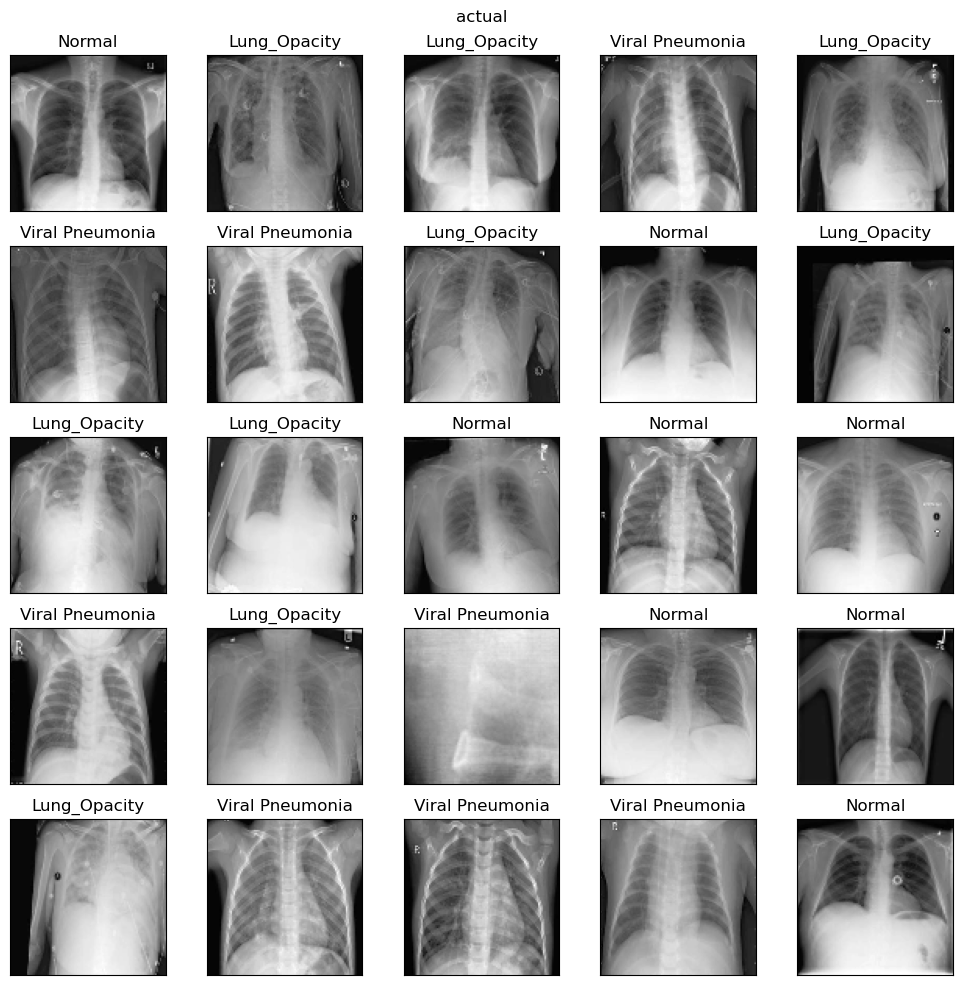

In [12]:
ShowGridImage(images , labels , 5 , "actual")

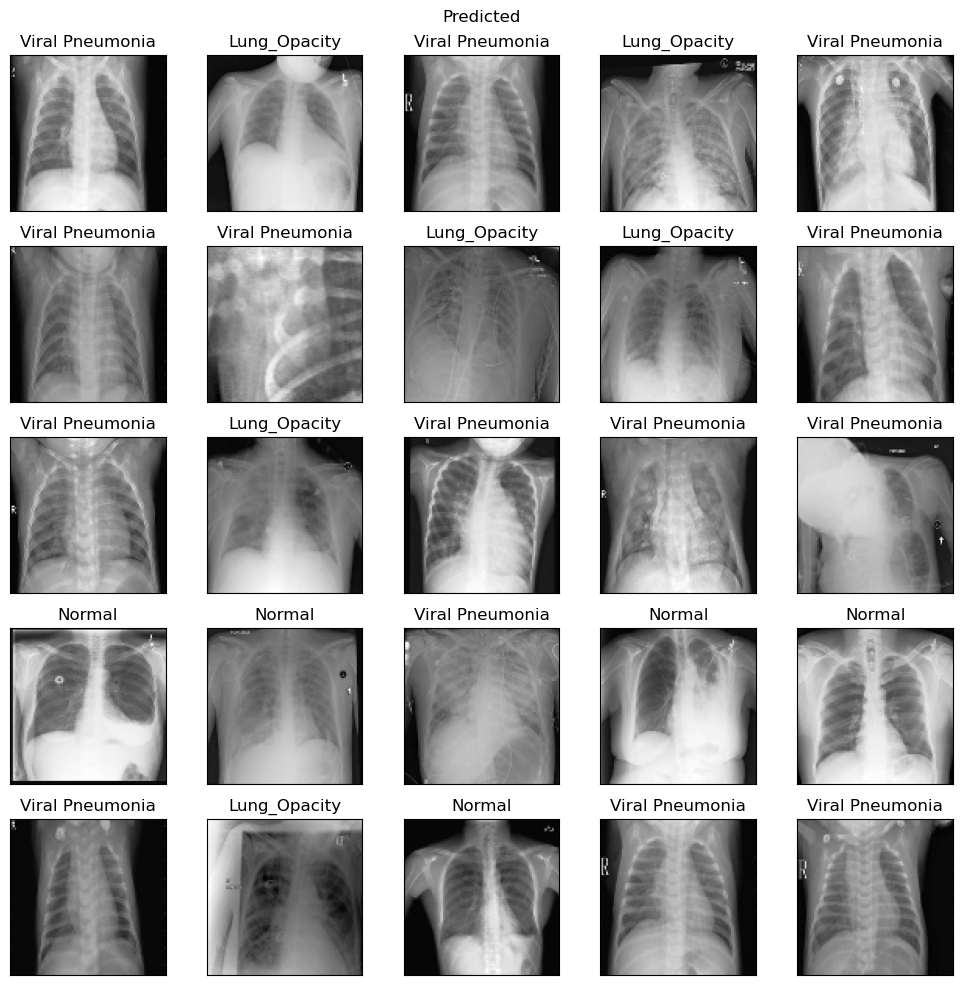

In [13]:
ShowGridImage(testImages , preds , 5 , "Predicted")

In [14]:
import joblib

In [15]:
with open("DecisionTree.pkl" , 'wb') as file :
    joblib.dump(model,file)

In [16]:
trainImages , testImages , trainLabels , testLabels = train_test_split(images , labels , test_size=0.2 , random_state=0)

In [17]:
model = RandomForestClassifier()

In [18]:
model.fit(trainImages , trainLabels)

RandomForestClassifier()

In [19]:
preds = model.predict(testImages)

In [20]:
accuracy_score(testLabels, preds)

0.8546762589928057

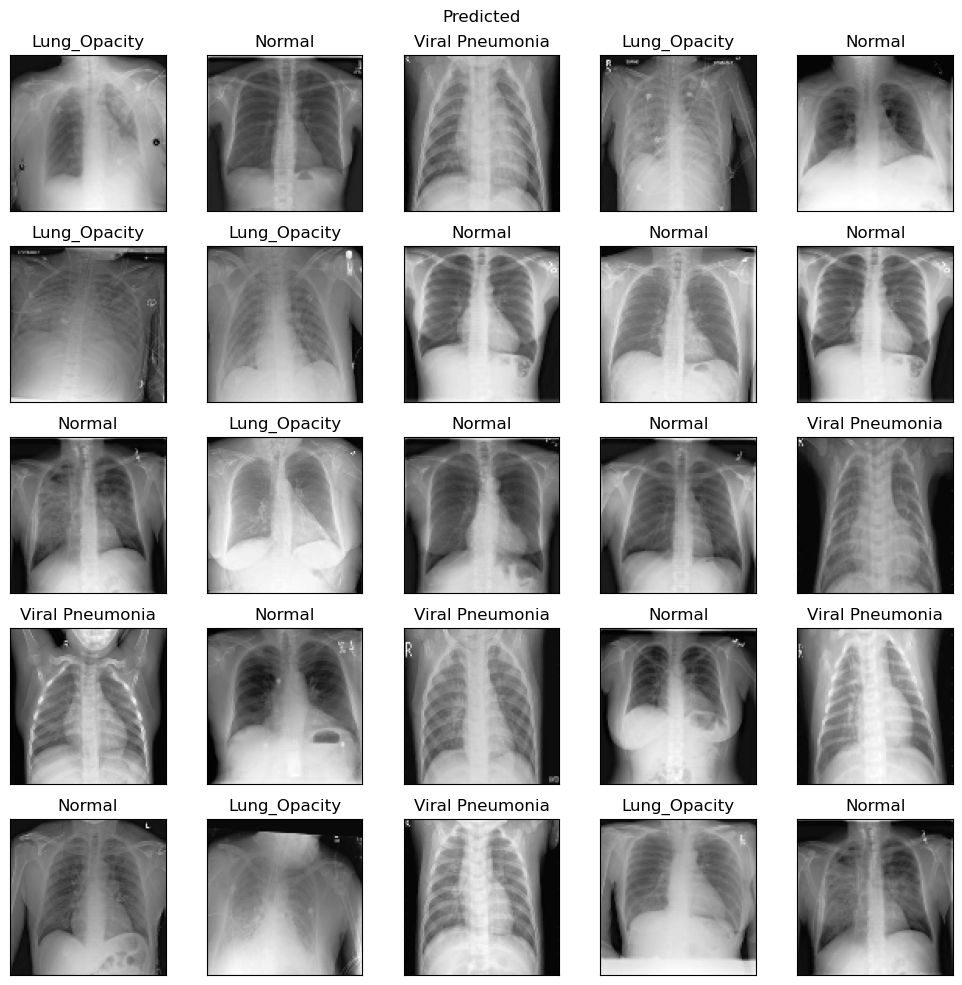

In [21]:
ShowGridImage(testImages, preds , 5 , "Predicted")
import joblib

In [24]:
with open("RandomForest.pkl", 'wb') as file:
    joblib.dump(model, file)

In [25]:
trainImages , testImages , trainLabels , testLabels = train_test_split(images , labels , test_size=0.2 , random_state=0)

In [26]:
model = LogisticRegression()

In [27]:
model.fit(trainImages , trainLabels)

C:\Users\mrmaa\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [30]:
preds = model.predict(testImages)

In [31]:
accuracy_score(testLabels, preds)

0.8258992805755395

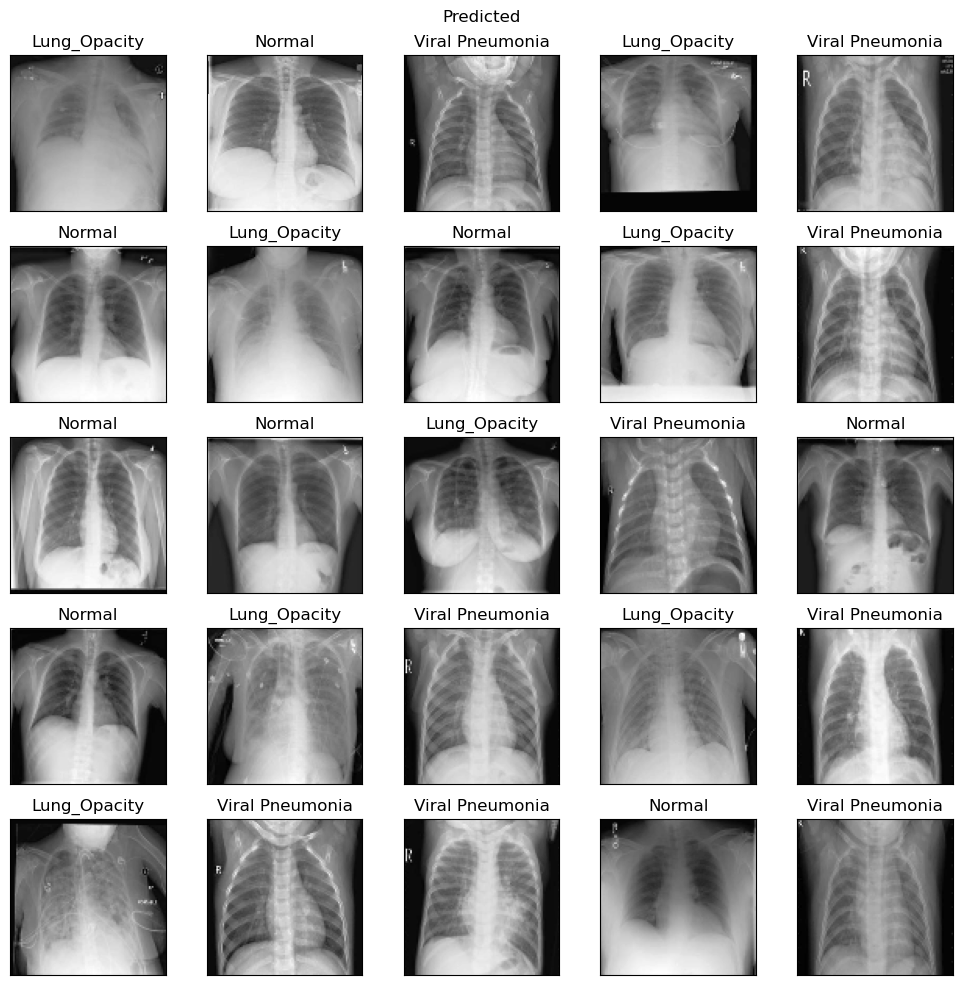

In [32]:
ShowGridImage(testImages , preds , 5 ,"Predicted") 

In [33]:
with open("LogisticRegression.pkl", 'wb') as file:
    joblib.dump(model, file)

In [42]:
from sklearn.metrics import classification_report

# Generate classification report
report = classification_report(testLabels, preds)

print("Classification Report:")
print(report)


Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.74      0.77       242
           1       0.76      0.78      0.77       218
           2       0.91      0.95      0.93       235

    accuracy                           0.83       695
   macro avg       0.82      0.83      0.82       695
weighted avg       0.82      0.83      0.82       695



NameError: name 'validationData' is not defined